Load Data Profile

Add Volume Profile



c:\Users\nerea\anaconda3\envs\SCenv\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


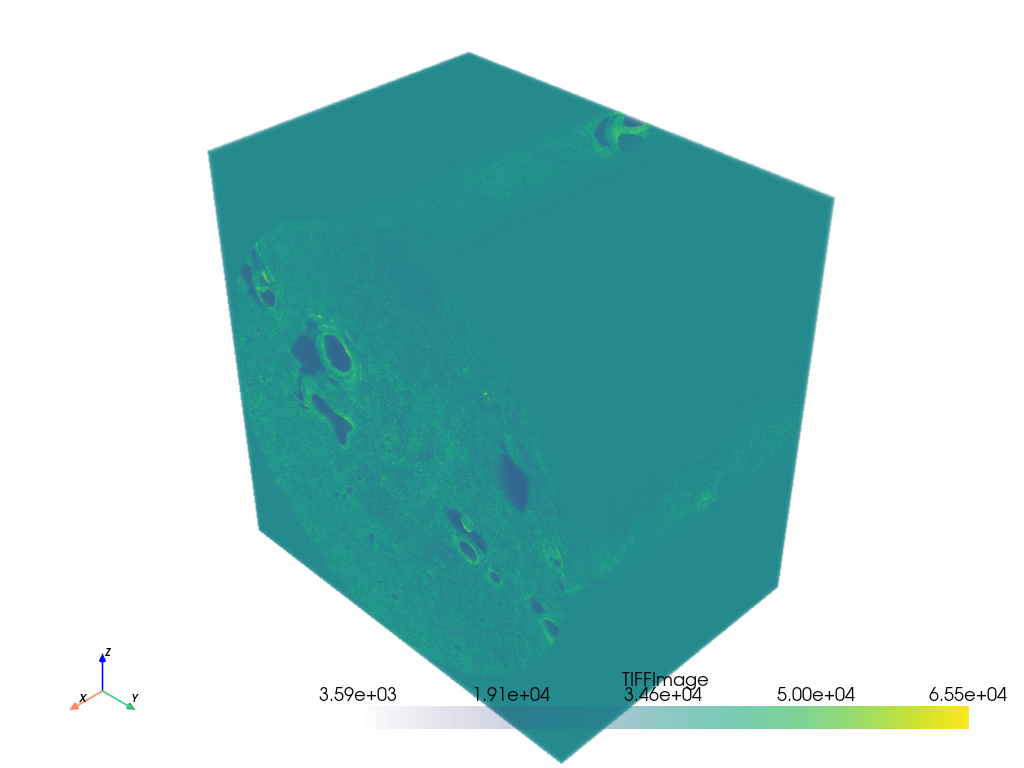

In [9]:
import os
import numpy as np
import tifffile as tiff
import pyvista as pv
import scipy.ndimage

def load_data(tiff_directory):
    # Read all TIFF files and stack them into a 3D volume
    tiff_files = sorted([f for f in os.listdir(tiff_directory) if f.endswith('.tif')])
    volume_data = np.array([tiff.imread(os.path.join(tiff_directory, f)) for f in tiff_files])

    downscale_factors = (0.2, 0.2, 0.2)  # Example: downscale by 50% in each dimension
    downscaled_volume = scipy.ndimage.zoom(volume_data, downscale_factors, order=1)

    del volume_data, tiff_files  # Free up memory

    # Create a PyVista UniformGrid
    volume = pv.ImageData()
    volume.dimensions = downscaled_volume.shape
    volume["TIFFImage"] = downscaled_volume.flatten(order="F")  # Flatten in Fortran order

    volume.spacing = (1, 1, 1)  # Set spacing; adjust as needed

    return volume

if __name__ == "__main__":
    folder = 'data/images'  # Specify the directory containing the TIFF files

    print("Load Data Profile")
    print("=================")

    volume = load_data(folder)

    print()

    p = pv.Plotter()

    print("Add Volume Profile")
    print("==================")

    p.add_volume(
        volume,
        blending="composite",
        scalars="TIFFImage",
        reset_camera=True,
    )

    print()

    p.add_axes()

    p.show()

Load Data Profile

Add Volume Profile



c:\Users\nerea\anaconda3\envs\SCenv\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


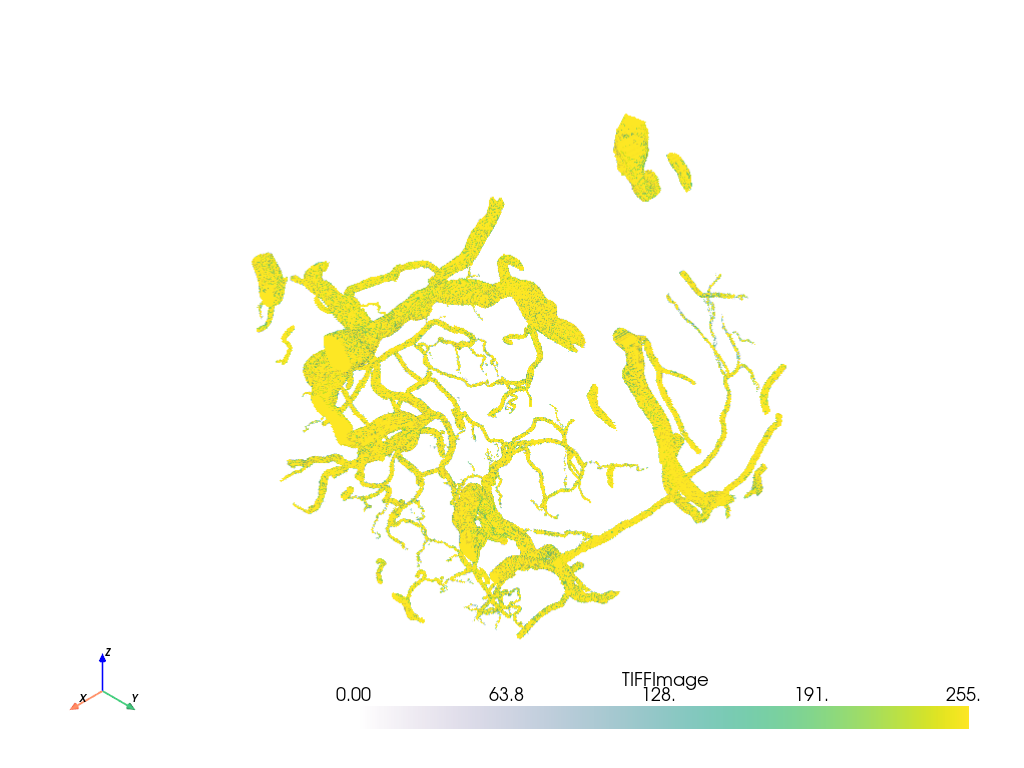

In [1]:
import os
import numpy as np
import tifffile as tiff
import pyvista as pv
import scipy.ndimage

def load_data(tiff_directory):
    # Read all TIFF files and stack them into a 3D volume
    tiff_files = sorted([f for f in os.listdir(tiff_directory) if f.endswith('.tif')])
    volume_data = np.array([tiff.imread(os.path.join(tiff_directory, f)) for f in tiff_files])

    downscale_factors = (0.2, 0.2, 0.2)  # Example: downscale by 80% in each dimension
    downscaled_volume = scipy.ndimage.zoom(volume_data, downscale_factors, order=1)

    del volume_data, tiff_files  # Free up memory

    # Create a PyVista UniformGrid
    volume = pv.ImageData()
    volume.dimensions = downscaled_volume.shape
    volume["TIFFImage"] = downscaled_volume.flatten(order="F")  # Flatten in Fortran order

    volume.spacing = (1, 1, 1)  # Set spacing; adjust as needed

    return volume

if __name__ == "__main__":
    folder = 'data/labels'  # Specify the directory containing the TIFF files

    print("Load Data Profile")
    print("=================")

    volume = load_data(folder)

    print()

    p = pv.Plotter()

    print("Add Volume Profile")
    print("==================")

    p.add_volume(
        volume,
        blending="composite",
        scalars="TIFFImage",
        reset_camera=True,
    )

    print()

    p.add_axes()

    p.show()